**Metoda gradientów sprzężonych**\
Łukasz Jarzęcki 331697

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

1. **Implementacja metody**

In [43]:
def cgm_solve(A,b,x0):
    x = x0
    r = b - A@x0
    p = r
    iters = 0

    while(np.linalg.norm(p) > 1e-6 ):
        iters += 1
        alfa = (np.dot(r,r))/(np.dot(p, A@p))
        x = x + alfa*p
        r_old = r
        r = r_old - alfa*A@p
        beta = (np.dot(r,r))/(np.dot(r_old,r_old))
        p = r + beta*p

    return x,iters
        

In [44]:
def detailed_cgm_analysis(A, b, x0):
    x = x0.copy()
    r = b - A @ x0
    p = r.copy()
    
    history = {
        'iterations': [],
        'x': [x.copy()],
        'residual_norms': [np.linalg.norm(r)],
        'gradients': [r.copy()],
        'conjugate_gradients': [p.copy()],
        'alphas': [],
        'betas': []
    }
    
    iteration = 0
    while np.linalg.norm(r) > 1e-6 and iteration < 100:  # Zabezpieczenie przed nieskończoną pętlą
        iteration += 1
        Ap = A @ p
        alpha = np.dot(r, r) / np.dot(p, Ap)
        x = x + alpha * p
        r_old = r.copy()
        r = r_old - alpha * Ap
        beta = np.dot(r, r) / np.dot(r_old, r_old)
        p = r + beta * p
        
        # Zapisz historię
        history['iterations'].append(iteration)
        history['x'].append(x.copy())
        history['residual_norms'].append(np.linalg.norm(r))
        history['gradients'].append(r.copy())
        history['conjugate_gradients'].append(p.copy())
        history['alphas'].append(alpha)
        history['betas'].append(beta)
    
    return history

def plot_detailed_cgm(history):
    fig = plt.figure(figsize=(14, 10))
    gs = GridSpec(3, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.semilogy(history['iterations'], history['residual_norms'][1:], 'b-o')
    ax1.set_xlabel('Iteracja')
    ax1.set_ylabel('Norma residuum (log)')
    ax1.set_title('Zbieżność residuum')
    ax1.grid(True)
    
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(history['iterations'], history['alphas'], 'r-o', label='alpha')
    ax2.plot(history['iterations'], history['betas'], 'g-s', label='beta')
    ax2.set_xlabel('Iteracja')
    ax2.set_ylabel('Wartość współczynnika')
    ax2.set_title('Współczynniki alpha i beta')
    ax2.legend()
    ax2.grid(True)
    
    ax3 = fig.add_subplot(gs[1, :])
    gradients = np.array(history['gradients'])
    for i in range(gradients.shape[1]):
        ax3.plot(history['iterations'], gradients[1:, i], marker='o', label=f'Gradient {i+1}')
    ax3.set_xlabel('Iteracja')
    ax3.set_ylabel('Wartość składowej')
    ax3.set_title('Składowe wektora gradientu (r)')
    ax3.legend()
    ax3.grid(True)
    
    ax4 = fig.add_subplot(gs[2, :])
    conj_gradients = np.array(history['conjugate_gradients'])
    for i in range(conj_gradients.shape[1]):
        ax4.plot(history['iterations'], conj_gradients[1:, i], marker='s', label=f'Kierunek sprzężony {i+1}')
    ax4.set_xlabel('Iteracja')
    ax4.set_ylabel('Wartość składowej')
    ax4.set_title('Składowe wektora kierunku sprzężonego (p)')
    ax4.legend()
    ax4.grid(True)
    
    plt.tight_layout()
    plt.show()

2. **Analiza**

Wczytanie danych

In [45]:
A = np.array([[4,2,-1],
              [2,5,2],
              [-1,2,10]])
b = np.array([12,-8,4])

x0_0 = np.array([0,0,0])
x0_1 = np.array([1,1,1])
x0_mixed = np.array([1,0,1])


Rozwiązanie wzorcowe

In [46]:
result_true = np.linalg.solve(A,b)
result_true

array([ 5.83206107, -4.70229008,  1.92366412])

Rozwiązania dla róznych wektorów startowych

In [47]:
result_0, iters_0 = cgm_solve(A,b, x0_0)
print(f"result = {result_0}, iteration count = {iters_0}")

result = [ 5.83206107 -4.70229008  1.92366412], iteration count = 3


In [48]:
result_1, iters_1 = cgm_solve(A,b, x0_1)
print(f"result = {result_1}, iteration count = {iters_1}")

result = [ 5.83206107 -4.70229008  1.92366412], iteration count = 3


In [49]:
result_mixed, iters_mixed = cgm_solve(A,b, x0_mixed)
print(f"result = {result_mixed}, iteration count = {iters_mixed}")

result = [ 5.83206107 -4.70229008  1.92366412], iteration count = 3


Wykresy

[0,0,0]

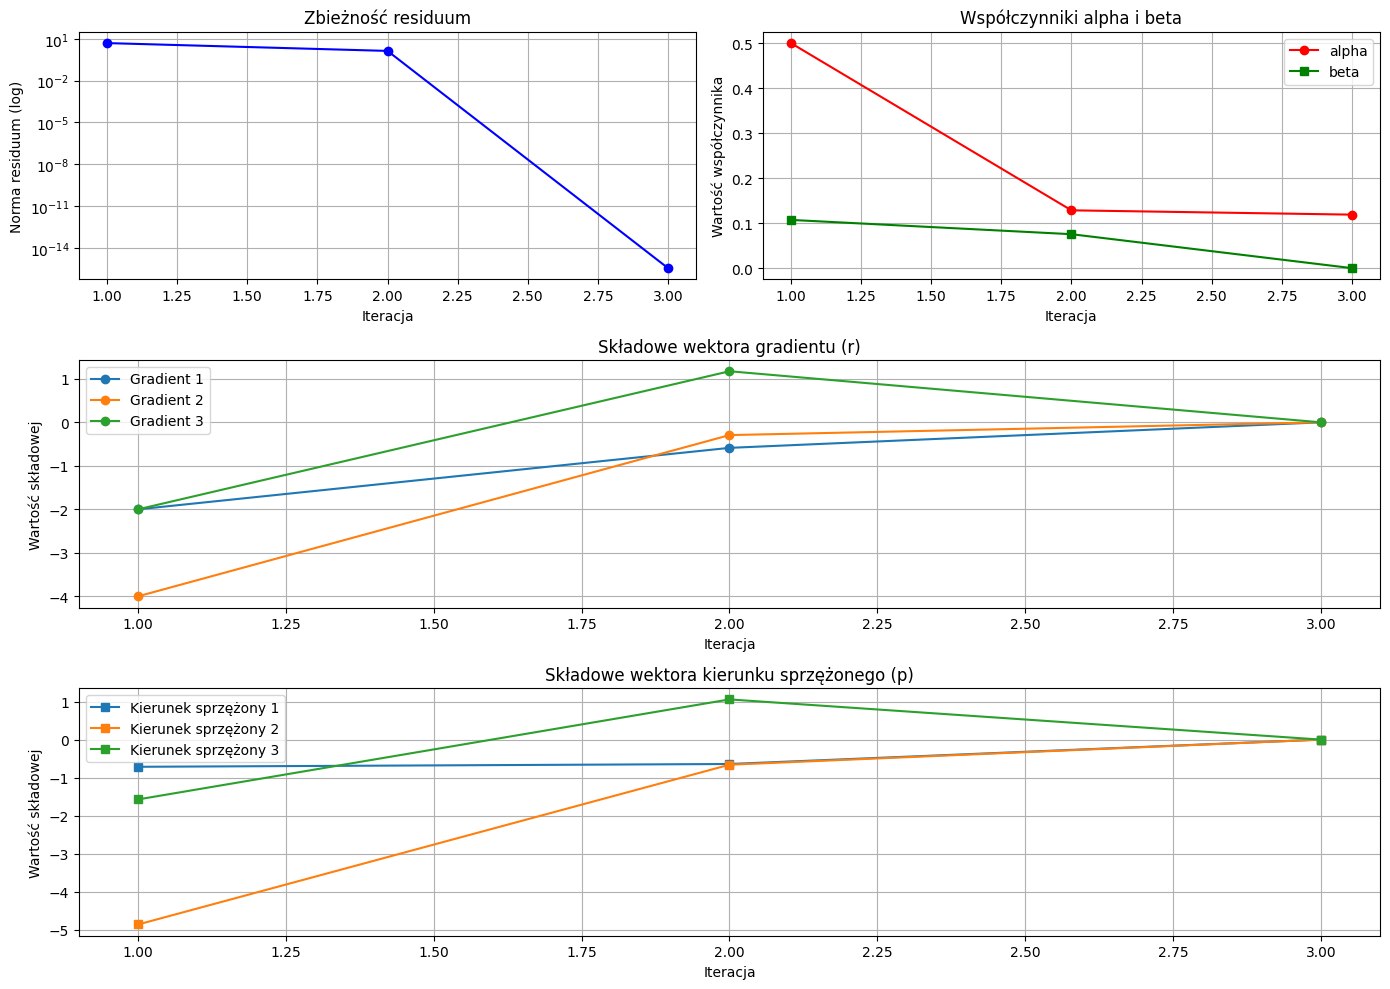

In [50]:
history = detailed_cgm_analysis(A, b, x0_0)
plot_detailed_cgm(history)

[1,1,1]

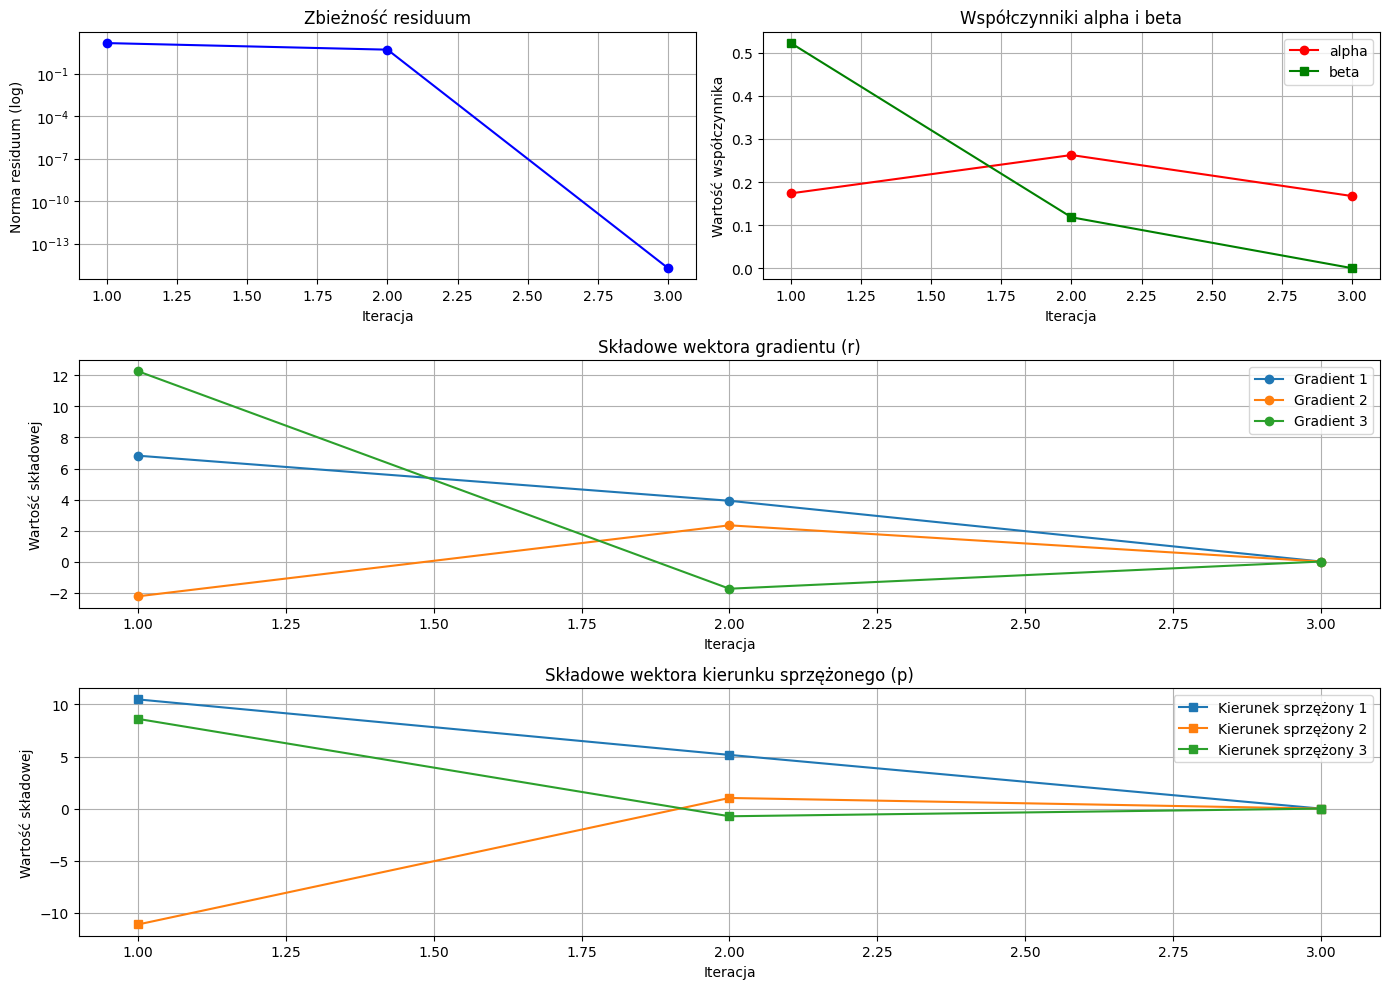

In [51]:
history = detailed_cgm_analysis(A, b, x0_1)
plot_detailed_cgm(history)

[1,0,1]

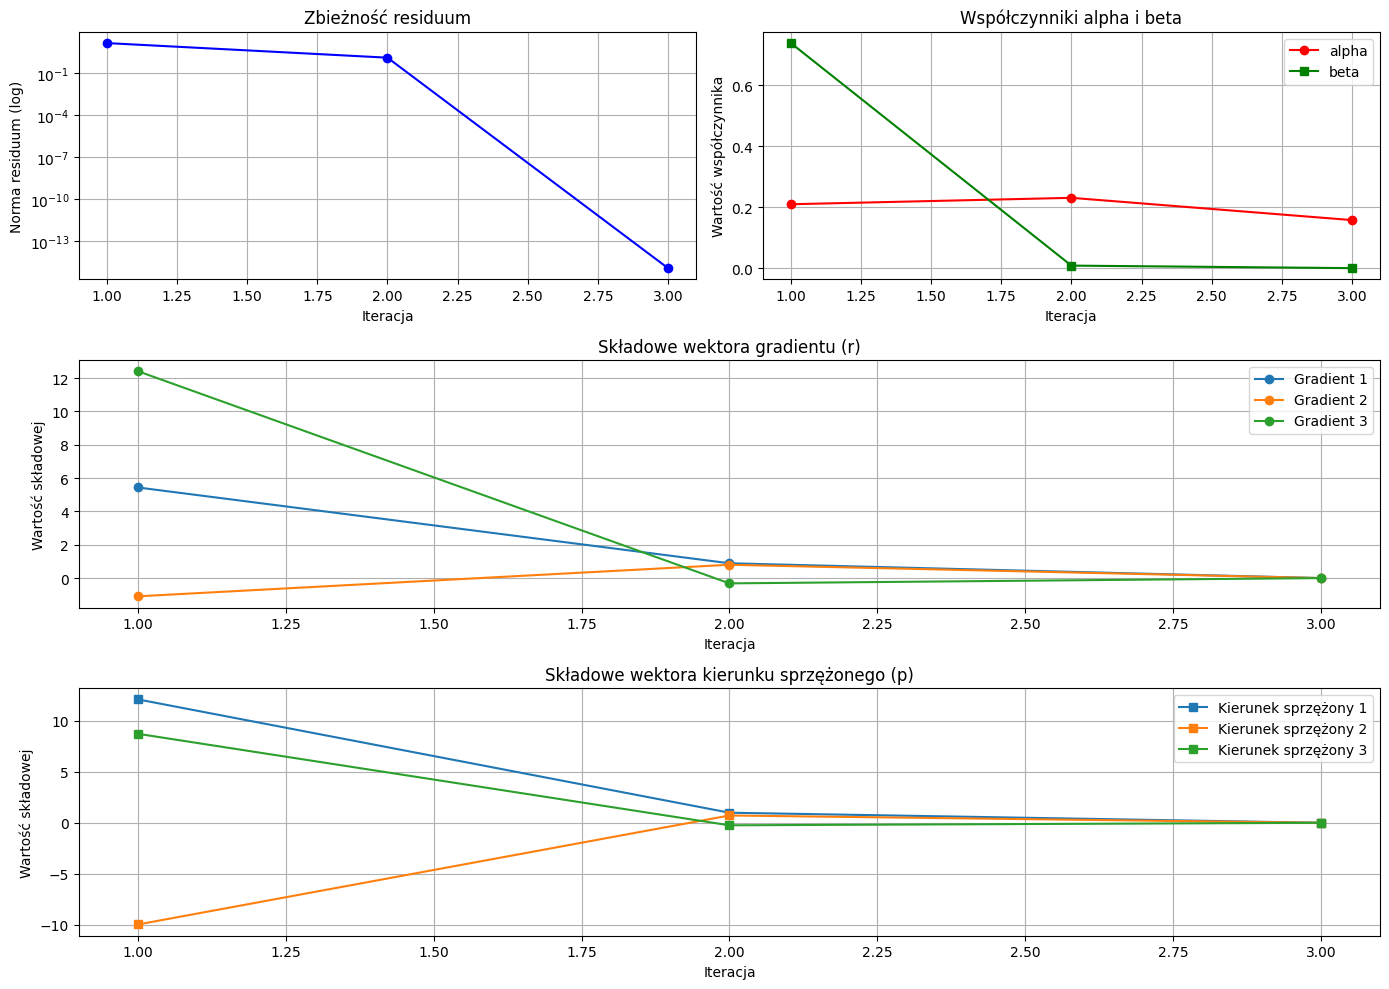

In [52]:
history = detailed_cgm_analysis(A, b, x0_mixed)
plot_detailed_cgm(history)

3. **Wnioski**

Dla tak małych układów wektory startowe praktycznie nie mają znaczenia i nie wpływają na szybkość zbieżności. Być może dla dużych układów ma to większe znaczenie.

Wadą metody jest to, że macierz musi być symetryczna i dodatnio określona.

Jak widać metoda gradientów sprzężonych zbiega do rozwiązania w najwyżej n krokach.